In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Crop.csv')
df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'Crop.csv'

In [59]:
df.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [60]:
df.shape

(2200, 8)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [62]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [63]:
df.duplicated().sum()

np.int64(0)

In [64]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


EXPLORING DATA

In [65]:
## Checking the target distribution
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [66]:
features = df.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


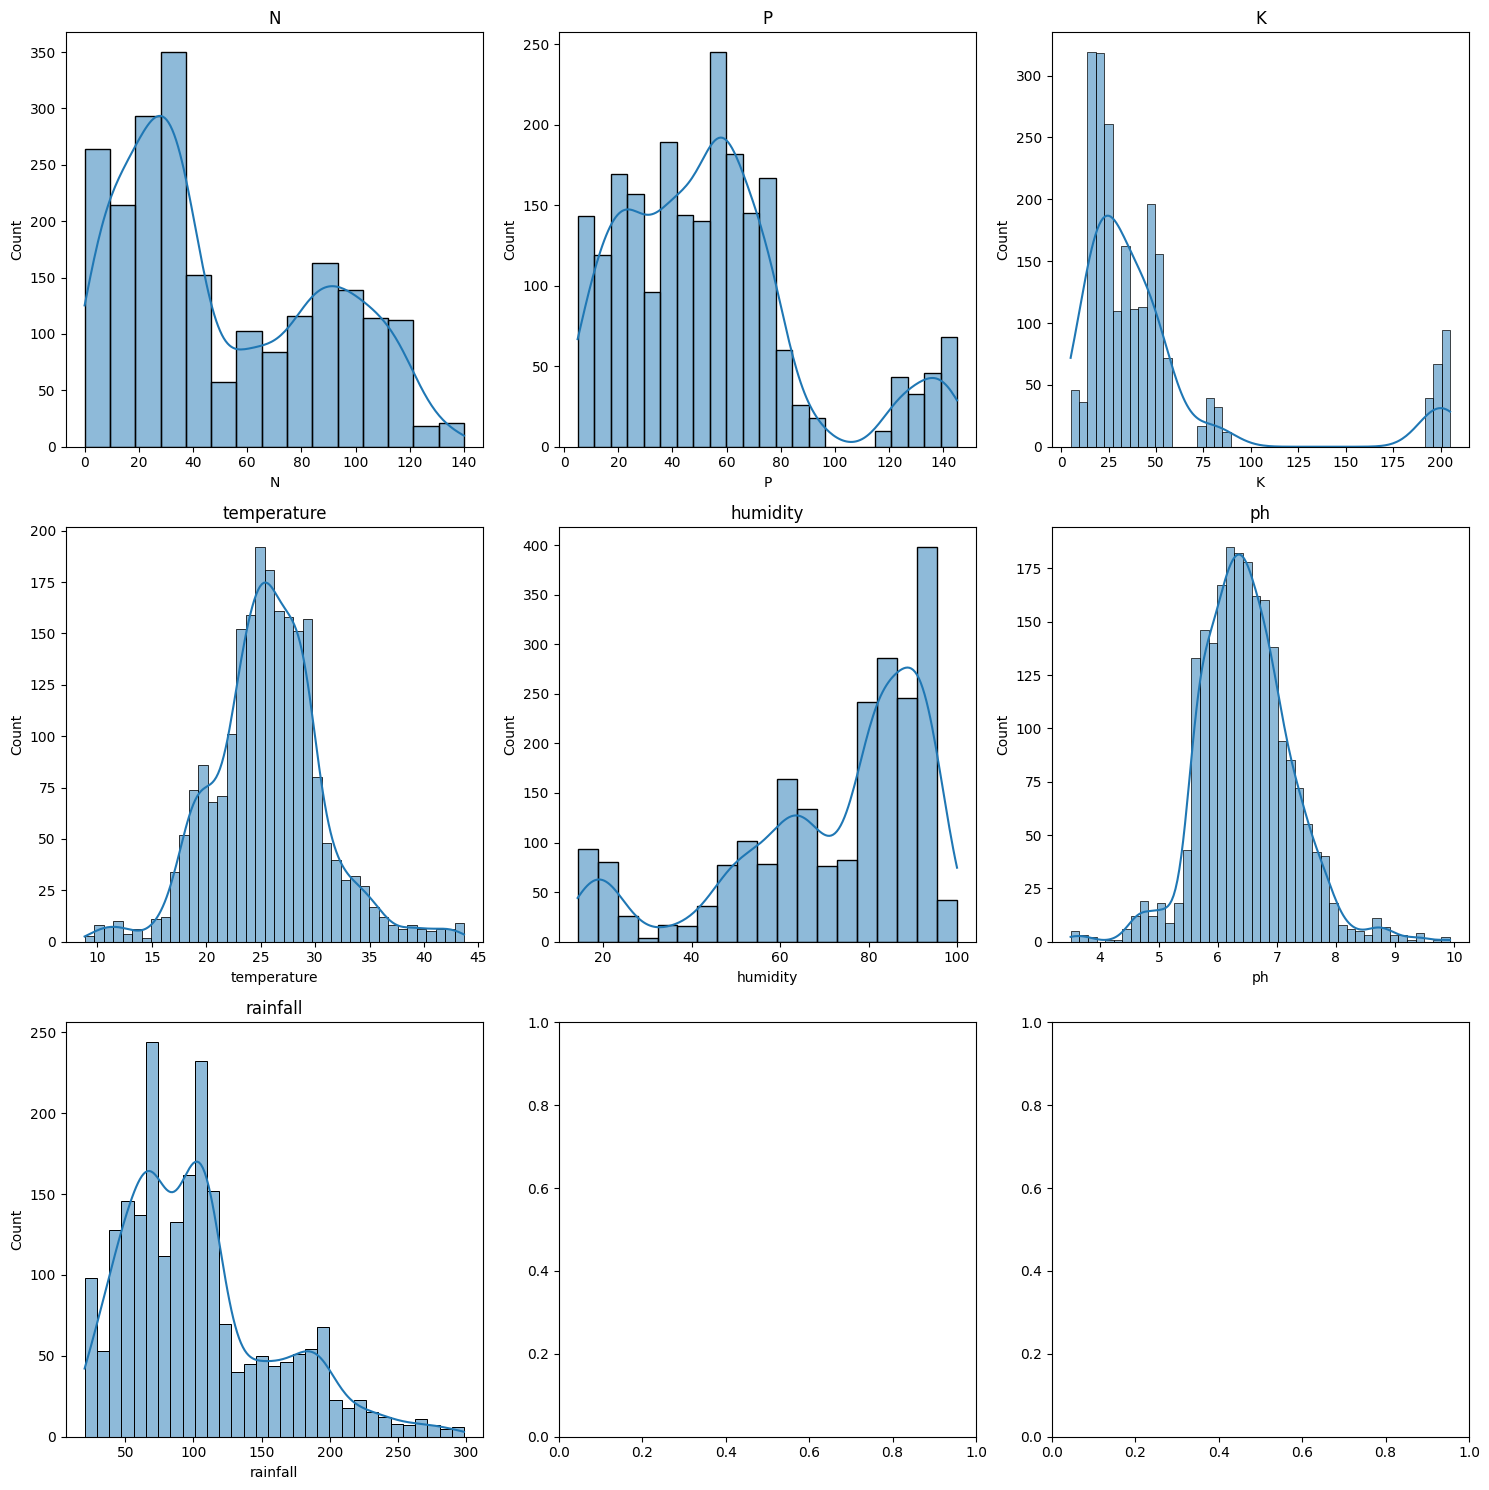

In [67]:
## Visualze the distribution of each feature
fig, ax = plt.subplots(3,3,figsize = (15,15))
for i , subplot in zip(features,ax.flatten()):
  sns.histplot(df[i], ax = subplot, kde=True)
  subplot.set_title(i)
plt.tight_layout()
plt.show()

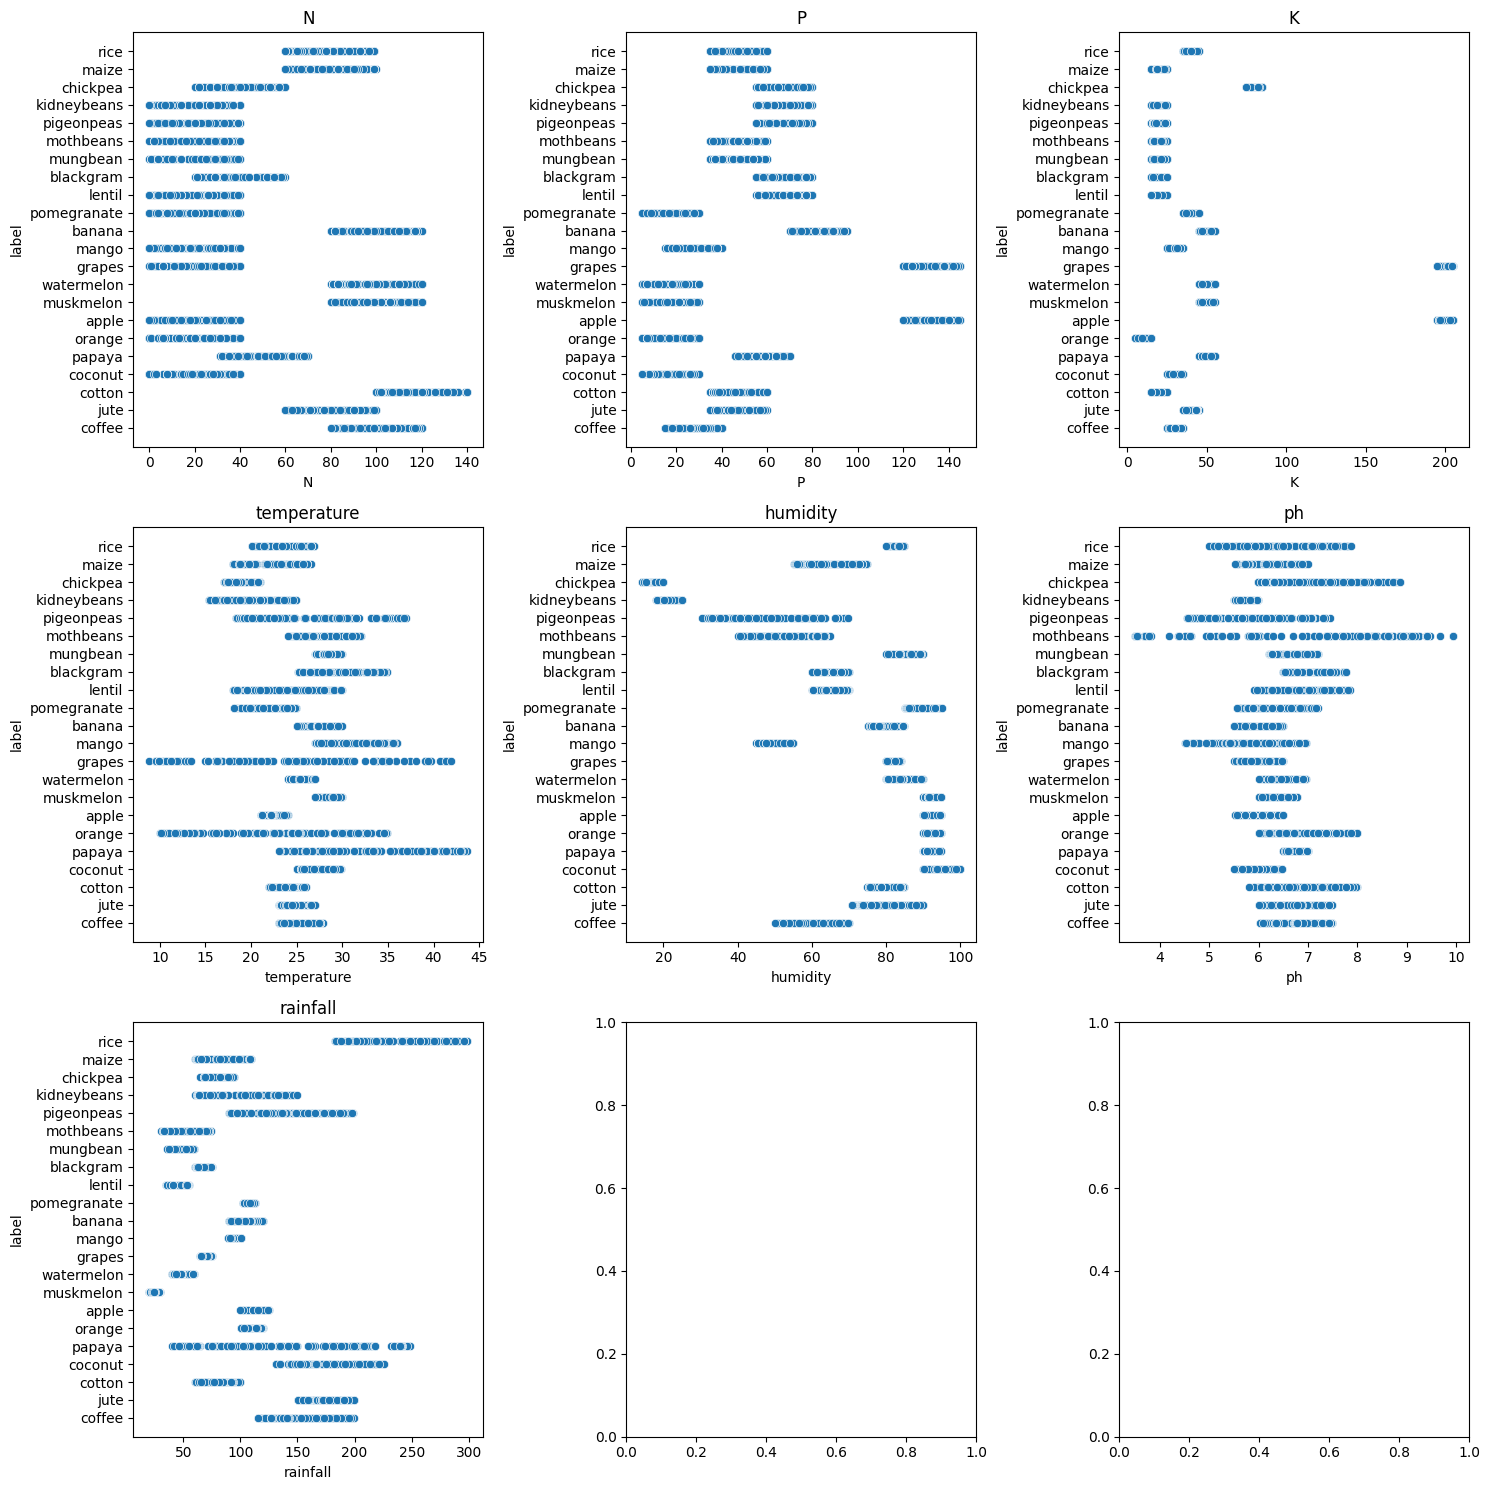

In [68]:
## plot scatter plot of each figure against the target
fig,ax = plt.subplots(3,3,figsize=(15,15))
for i, subplot in zip(features,ax.flatten()):
  sns.scatterplot(x=df[i],y=df['label'],ax=subplot)
  subplot.set_title(i)
plt.tight_layout()
plt.show()

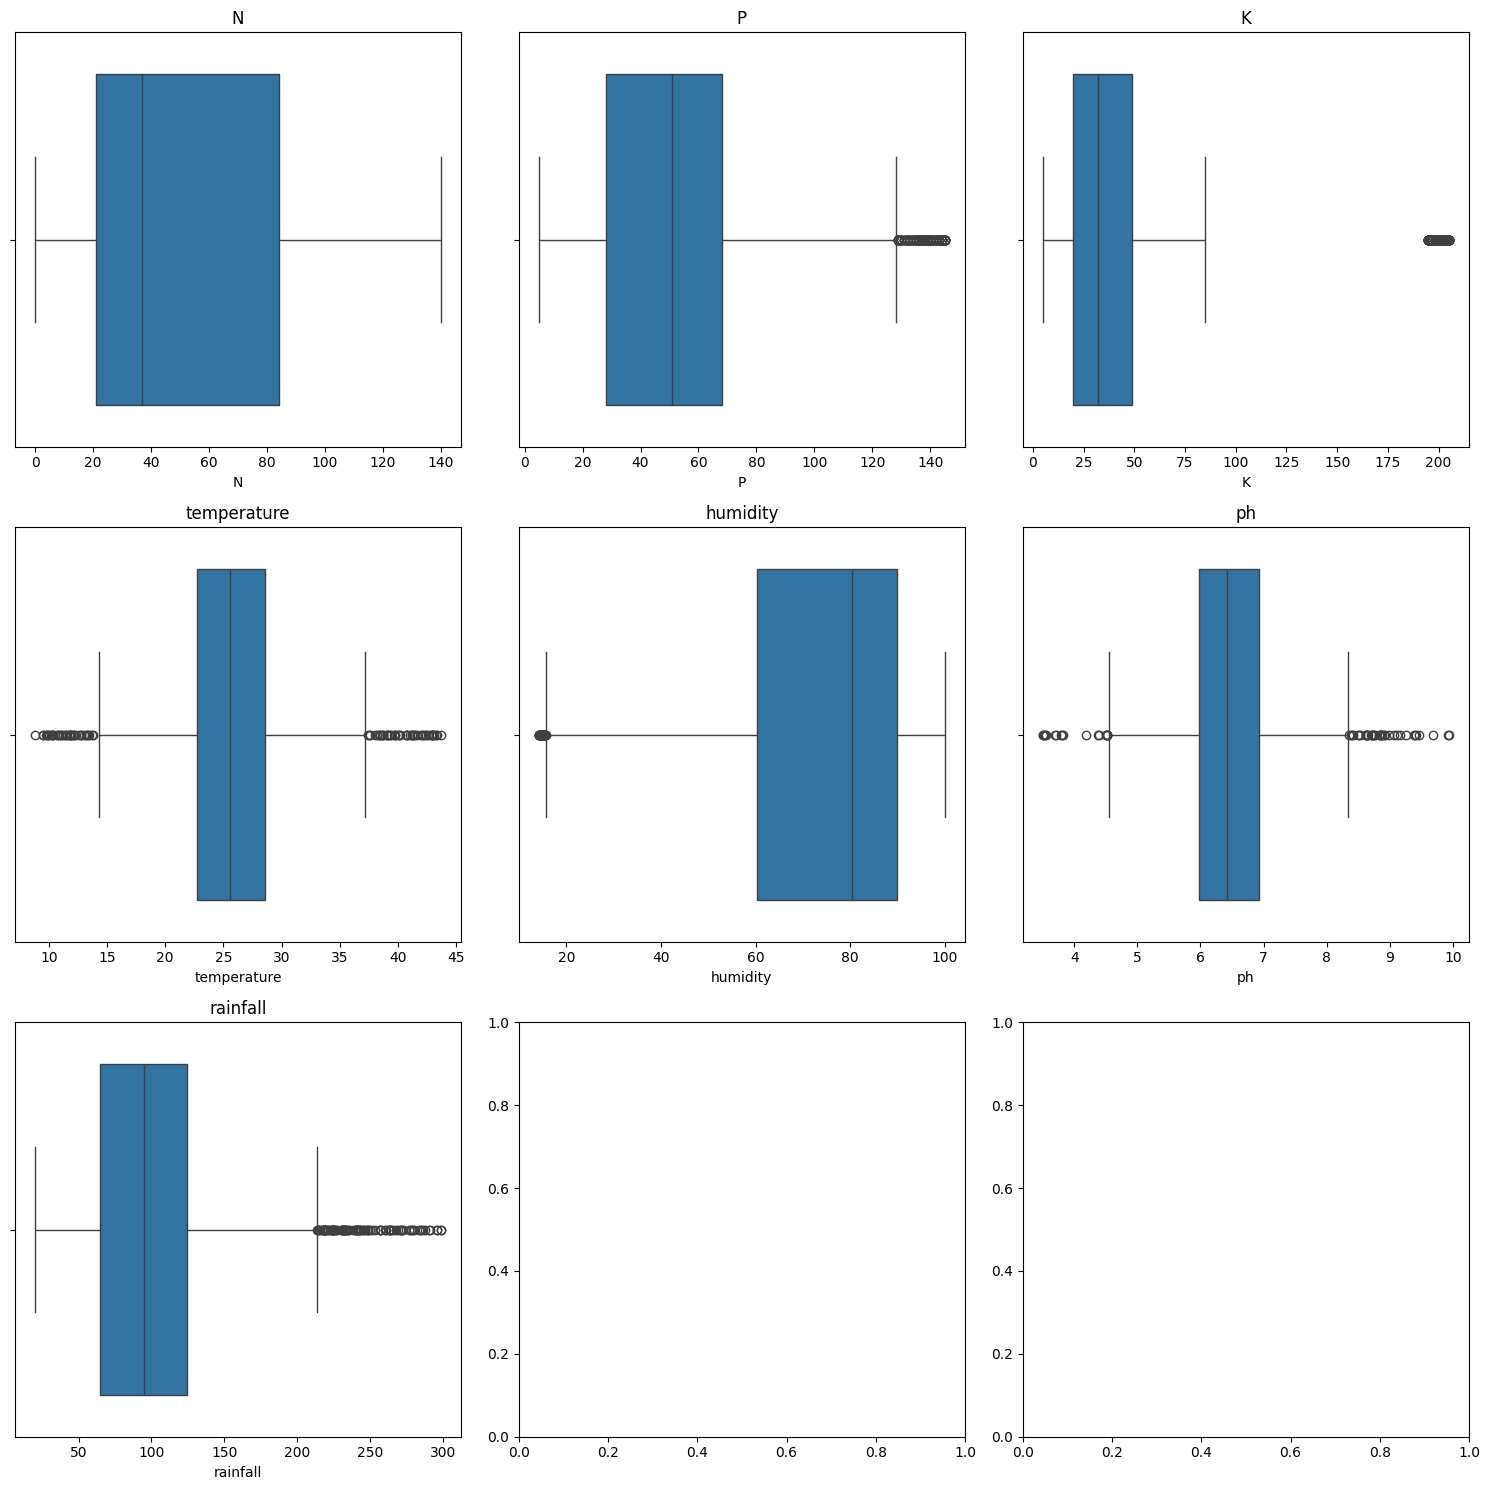

In [69]:
## creating a box plot for each feature to check for outliers
fig,ax = plt.subplots(3,3,figsize=(15,15))
for i, subplot in zip(features,ax.flatten()):
  sns.boxplot(x=df[i],ax=subplot)
  subplot.set_title(i)
plt.tight_layout()
plt.show()

In [70]:
## check the correlation of the features
numerical_columns = df.select_dtypes(include=[np.number])
corr = numerical_columns.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


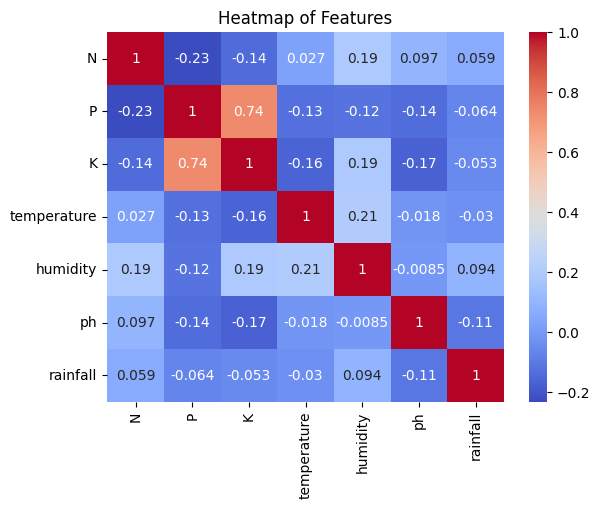

In [71]:
## Visualize the correlation matrix
import seaborn as sns
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap of Features")
plt.show()

## ENCODING

In [72]:
crop_dict ={
    'rice':1,
    'maize':2,
    'jute':3,
    'cotton':4,
    'coconut':5,
    'papaya':6,
    'orange':7,
    'apple':8,
    'muskmelon':9,
    'watermelon':10,
    'grapes':11,
    'mango':12,
    'banana':13,
    'pomegranate':14,
    'lentil':15,
    'blackgram':16,
    'mungean':17,
    'mothbeans':18,
    'pigeonpeas':19,
    'kidneybeans':20,
    'chickpea':21,
    'coffee':22,
}

In [73]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [74]:
df['crop'] = df['label'].map(crop_dict)

In [75]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1.0


In [76]:
df['crop'].value_counts()

,count
crop,
1.0,100
2.0,100
21.0,100
20.0,100
19.0,100
18.0,100
16.0,100
15.0,100
14.0,100


In [77]:
df.drop('label', axis = 1, inplace = True)
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22.0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22.0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22.0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22.0
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,22.0


## TRAIN TEST SPLIT

In [78]:
x = df.drop('crop', axis = 1)
y = df['crop']
print(f"The shape of x is {x.shape}")
print(f"The shape of y is {y.shape}")


The shape of x is (2200, 7)
The shape of y is (2200,)


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [80]:
print(f"Shape of X_train is {X_train.shape}")
print(f"Shape of X_test is {X_test.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of y_test is {y_test.shape}")

Shape of X_train is (1760, 7)
Shape of X_test is (440, 7)
Shape of y_train is (1760,)
Shape of y_test is (440,)


## SCALING

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### TRAINING MODEL

In [82]:
## lets us train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [101]:
# initalize the decision tree classifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [85]:
x = df.drop('crop', axis = 1)
y = df['crop']
if y.isnull().any():
    print("NaN values found in the target variable 'y'. Removing rows with NaN in 'y'.")
    nan_indices = y[y.isnull()].index
    x = x.drop(nan_indices)
    y = y.drop(nan_indices)
    print(f"New shape of x after removing NaNs: {x.shape}")
    print(f"New shape of y after removing NaNs: {y.shape}")
print(f"The shape of x is {x.shape}")
print(f"The shape of y is {y.shape}")
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(f"Shape of X_train is {X_train.shape}")
print(f"Shape of X_test is {X_test.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of y_test is {y_test.shape}")

NaN values found in the target variable 'y'. Removing rows with NaN in 'y'.
New shape of x after removing NaNs: (2100, 7)
New shape of y after removing NaNs: (2100,)
The shape of x is (2100, 7)
The shape of y is (2100,)
Shape of X_train is (1680, 7)
Shape of X_test is (420, 7)
Shape of y_train is (1680,)
Shape of y_test is (420,)


In [100]:
y_pred = DT.predict(X_test)
print(f"Accuracy score of Decision Tree Classifier is: {accuracy_score(y_test,y_pred)}")

Accuracy score of Decision Tree Classifier is: 0.9880952380952381


In [99]:
y_pred_train = DT.predict(X_train)
print(f"Accuracy score of Decision Tree Classifier is: {accuracy_score(y_train,y_pred_train)}")

Accuracy score of Decision Tree Classifier is: 1.0


## Predictive System

In [90]:
def crop_recommend(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    transformed_features = scaler.transform(features)
    prediction = DT.predict(transformed_features).reshape(1,-1)
    crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut",
                 6: "Papaya", 7: "Orange", 8: "Apple", 9: "Muskmelon", 10: "Watermelon",
                 11: "Grapes", 12: "Mango", 13: "Banana", 14: "Pomegranate", 15: "Lentil",
                 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",19: "Pigeonpeas",
                 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
    crop = [crop_dict[i] for i in prediction[0]]
    return f"{crop} is a best crop to be cultivated "

In [98]:
N = 122
P = 49
K = 13
temperature = 29
humidity = 42
ph = 6.1
rainfall = 202
crop_recommend(N,P,K,temperature,humidity,ph,rainfall)

"['Kidneybeans'] is a best crop to be cultivated "

## Save the model


In [97]:
import pickle
pickle.dump(DT, open('crop_model.sav', 'wb'))
pickle.dump(scaler, open('crop_scaler.sav', 'wb'))

## Use a trained saved model for new predictions

In [93]:
DT = pickle.load(open('crop_model.sav', 'rb'))
scaler = pickle.load(open('crop_scaler.sav', 'rb'))

In [95]:
# Predicting the crop for the given environment
N = 90
P = 42
K = 43
temperature = 20
humidity = 82
ph = 6.1
rainfall = 202
crop_recommend(N,P,K,temperature,humidity,ph,rainfall)

"['Kidneybeans'] is a best crop to be cultivated "